In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Ellipse
from uslf_weights import uslf_weights
from copy import copy

# NeSH

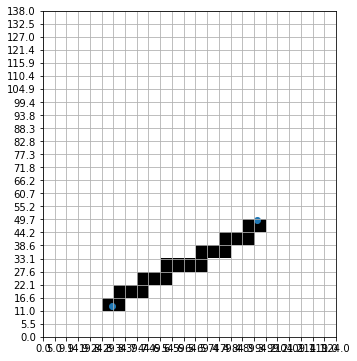

In [38]:
Nx = 25
Ny = 25
xmax = 124
ymax = 138

my_weights_NeSh = uslf_weights(Nx, Ny, xmax, ymax)

pa = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])
pb = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])

xcg, ycg, xe, ye = my_weights_NeSh.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

my_weights_NeSh.plot_line_supercover(xe, ye, figsize=(10,6),start_p=pa, stop_p=pb)

# NeSh multiple line segments

In [39]:
Nx = 30
Ny = 30

xmax = 124
ymax = 138

my_weights_NeSh_mult = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_NeSh_mult.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.random.rand(10,2)*100
pb = np.random.rand(10,2)*100

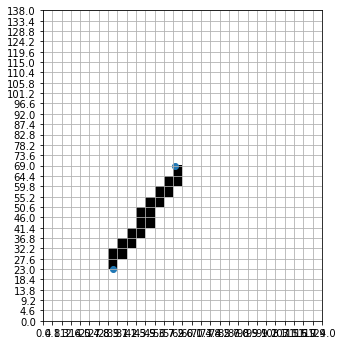

In [40]:
output_matrix = my_weights_NeSh_mult.fill_matrix_apm_1(xe, ye, pa, pb)

line = np.random.randint(0, pa.shape[0]-1)
apm_1 = np.reshape(output_matrix[line, :], (Ny, Nx))
_ = my_weights_NeSh_mult.plot_apm(pa[line, :], pb[line, :], xe, ye, apm_1, figsz=(5,20))

# NEM one line segment

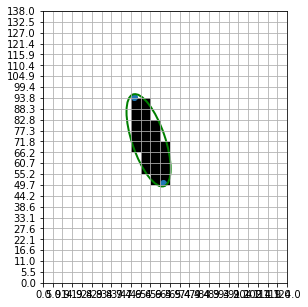

In [41]:
Nx = 25
Ny = 25
xmax = 124
ymax = 138

my_weights_NEM = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_NEM.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])
pb = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])

out_mat, gell = my_weights_NEM.fill_matrix_apm_2(xcg, ycg, 20, pa, pb)

ax = my_weights_NEM.plot_apm(pa, pb, xe, ye, out_mat)
ax.add_patch(gell)
plt.show()

# NEM with multiple line segments

In [42]:
Nx = 20
Ny = 20

xmax = 124
ymax = 138

my_weights_NEM_mult = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_NEM_mult.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.random.rand(10,2)*100
pb = np.random.rand(10,2)*100

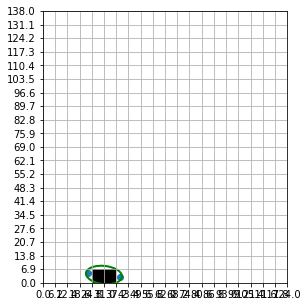

In [43]:
out_mat, gell = my_weights_NEM_mult.fill_matrix_apm_2(xcg, ycg, 30, pa, pb, save_ell_plot=True)

line = np.random.randint(0, pa.shape[0]-1)
apm_2 = np.reshape(out_mat[line, :], (Ny, Nx))
ax = my_weights_NEM_mult.plot_apm(pa[line, :], pb[line, :], xe, ye, apm_2)
ax.add_patch(gell[line])
plt.show()

# IAEM with one line segment

In [44]:
Nx = 30
Ny = 30
xmax = 124
ymax = 138

my_weights_IAEM = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_IAEM.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.array([np.random.rand()*xmax*(5/6), np.random.rand()*ymax*(5/6)])
pb = np.array([np.random.rand()*xmax*(5/6), np.random.rand()*ymax*(5/6)])

out_mat, gell = my_weights_IAEM.fill_matrix_apm_3(xcg, ycg, 20, pa, pb, verbose=True)

Center coordinates:  [41.3829475  64.62716977]
Counter-clockwise angle between foci:  97.68515929049289
Distance center to foci:  41.6889062515547
Distance center to foci:  41.6889062515547
Width should be always greater than c. Is it true in this case:  True
Width of ellipse:  44.36440739173661
Height of ellipse:  15.173520974680123


In [45]:
'''

The entries of the APM for the IAEM have different orders of magnitude.
The quantiles show this 

'''

f, c = np.nonzero(out_mat)
nz_outmat = [out_mat[i[0], i[1]] for i in zip(f, c)]
print(np.quantile(nz_outmat, (0.5, 0.9, 0.95, 0.99)))

[0.00199931 0.02999503 0.25634082 1.50213406]


C:\Users\julia\AppData\Local\Temp/ipykernel_20904/2945052159.py:4: RuntimeWarning: divide by zero encountered in log
  ax = my_weights_IAEM.plot_apm(pa, pb,xe, ye, np.log(out_mat/min_val), cmp='Greys')


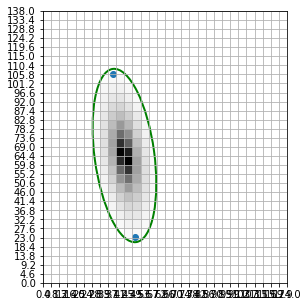

In [46]:
# Scale the output matrix for ploting purposes
min_val = np.min(out_mat[np.nonzero(out_mat)])

ax = my_weights_IAEM.plot_apm(pa, pb,xe, ye, np.log(out_mat/min_val), cmp='Greys')
ax.add_patch(gell)
plt.show()

# IAEM with multiple line segments

In [18]:
Nx = 20
Ny = 20

xmax = 124
ymax = 138

my_weights_IAEM_mult = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_IAEM_mult.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.random.rand(10,2)*100
pb = np.random.rand(10,2)*100

alpha = np.random.randint(20, 70, size=(pa.shape[0],))

out_mat, gell = my_weights_IAEM_mult.fill_matrix_apm_3(xcg, ycg, alpha, pa, pb, save_ell_plot=True)

C:\Users\julia\AppData\Local\Temp/ipykernel_26776/1381830479.py:4: RuntimeWarning: divide by zero encountered in log
  ax = my_weights_IAEM_mult.plot_apm(pa[line, :], pb[line, :], xe, ye, np.log(apm_3/min_val), cmp='Greys')


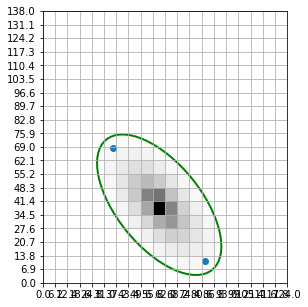

In [34]:
line = np.random.randint(0, pa.shape[0]-1)
apm_3 = np.reshape(out_mat[line, :], (Ny, Nx))
min_val = np.min(apm_3[np.nonzero(apm_3)])
ax = my_weights_IAEM_mult.plot_apm(pa[line, :], pb[line, :], xe, ye, np.log(apm_3/min_val), cmp='Greys')

cpy_ell = copy(gell[line])
ax.add_patch(cpy_ell)

plt.show()

# IAEM with piecewise curve

In [2]:
Nx = 20
Ny = 20

xmax = 124
ymax = 138

w_IAEM_curve = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = w_IAEM_curve.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

n_curves = 10
n_max_curve_segments = 5

input_curves = []
alpha = []
for i in range(n_curves):
    n_curve_foci = np.random.randint(2, n_max_curve_segments+1)
    input_curves.append(np.random.rand(n_curve_foci, 2)*100)
    alpha.append(np.random.randint(20, 70, size=(n_curve_foci-1,)) ) # the number of ellipses is the number of foci - 1 in the piecewise curve

out_mat, gell = w_IAEM_curve.fill_matrix_apm_piecewise_curve(xcg, ycg, alpha, input_curves, save_ell_plot=True)

C:\Users\julia\AppData\Local\Temp/ipykernel_30588/1797410546.py:4: RuntimeWarning: divide by zero encountered in log
  ax = w_IAEM_curve.plot_apm_piecewise_curve(input_curves[line], xe, ye, np.log(apm_piecewise_curve/min_val), cmp='Greys')


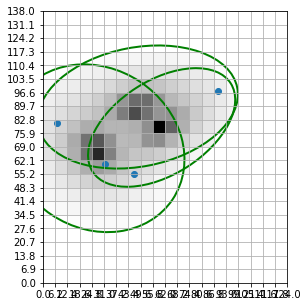

10
5
(4, 2)


In [10]:
line = np.random.randint(0, n_curves - 1)
apm_piecewise_curve = np.reshape(out_mat[line, :], (Ny, Nx))
min_val = np.min(apm_piecewise_curve[np.nonzero(apm_piecewise_curve)])
ax = w_IAEM_curve.plot_apm_piecewise_curve(input_curves[line], xe, ye, np.log(apm_piecewise_curve/min_val), cmp='Greys')

for i in gell[line]:
    cpy_ell = copy(i)
    ax.add_patch(cpy_ell)

plt.show()

print(len(input_curves))
print(line)
print(input_curves[line].shape)

# IAEM with piecewise curve and multiple curves per time snap

In [2]:
Nx = 20
Ny = 20

xmax = 124
ymax = 138

w_IAEM_curve_mpc = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = w_IAEM_curve_mpc.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

n_t = 10
n_pth_max = 5
n_max_curve_segments = 4

input_curves = []
alpha = []
for i in range(n_t):
    input_curves.append([])
    alpha.append([])
    for j in range(np.random.randint(1, n_pth_max+1)):   
        n_curve_foci = np.random.randint(2, n_max_curve_segments+1)
        input_curves[i].append(np.random.rand(n_curve_foci, 2)*100)
        alpha[i].append(np.random.randint(20, 70, size=(n_curve_foci-1,)) ) # the number of ellipses is the number of foci - 1 in the piecewise curve

out_mat, gell = w_IAEM_curve_mpc.fill_matrix_apm_piecewise_curve(xcg, ycg, alpha, input_curves, save_ell_plot=True, combine_paths='add')

C:\Users\julia\AppData\Local\Temp/ipykernel_10152/1316258306.py:4: RuntimeWarning: divide by zero encountered in log
  ax = w_IAEM_curve_mpc.plot_apm_piecewise_curve(input_curves[ts], xe, ye, np.log(apm_piecewise_curve/min_val), cmp='Greys')


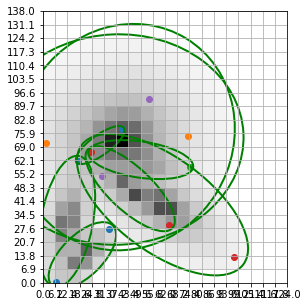

10
5
[(4, 2), (2, 2), (2, 2), (3, 2), (2, 2)]


In [5]:
ts = np.random.randint(0, n_t - 1)
apm_piecewise_curve = np.reshape(out_mat[ts, :], (Ny, Nx))
min_val = np.min(apm_piecewise_curve[np.nonzero(apm_piecewise_curve)])
ax = w_IAEM_curve_mpc.plot_apm_piecewise_curve(input_curves[ts], xe, ye, np.log(apm_piecewise_curve/min_val), cmp='Greys')

for i in gell[ts]:
    for j in i:
        cpy_ell = copy(j)
        ax.add_patch(cpy_ell)

plt.show()

print(len(input_curves))
print(len(input_curves[ts]))
print([i.shape for i in input_curves[ts]])

In [12]:
a = np.random.rand(8,)
print(a)
print(a[3:5])

[0.07510752 0.301292   0.76612416 0.68355857 0.54010943 0.45301065
 0.67921896 0.68463449]
[0.68355857 0.54010943]
